In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict

№4

In [2]:
df = pd.read_csv(r"C:\Users\Мой ПК\Dropbox\Мой ПК (LAPTOP-TOID7NG7)\Downloads\22-23_hse_probability.csv", sep = ",")
df = df[['Экзамен', 'Last name']]
df.fillna(0, inplace=True)
df

,Экзамен,Last name
0,4.0,Репенкова
1,0.0,Ролдугина
2,5.0,Сафина
3,9.0,Сидоров
4,6.0,Солоухин
...,...,...
332,0.0,Наугольнова
333,0.0,Хафизов
334,0.0,Герасимов
335,0.0,Тайирбек уулу


In [3]:
group1 = df[df['Last name'].str[0].isin(['А', 'О', 'У', 'Э', 'И'])]['Экзамен']
group2 = df[df['Last name'].str[0].isin(['Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ'])]['Экзамен']

а) [5] Используйте тест Уэлча

In [4]:
import pandas as pd
import random
from scipy import stats

mean1 = group1.mean()
mean2 = group2.mean()
print('Средняя оценка для группы 1:', mean1)
print('Средняя оценка для группы 2:', mean2)

t_stat, p_value = stats.ttest_ind(group1, group2)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, не равны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.")


Средняя оценка для группы 1: 4.611111111111111
Средняя оценка для группы 2: 4.909722222222222
p-значение: 0.5338093991657107
Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.


б) [5] Используйте наивный бутстрэп.

In [5]:
m_vowels = np.mean(group1)
m_consonants = np.mean(group2)

obs_diff = m_consonants - m_vowels

n_iter = 1000

boot_diffs = []
for i in range(n_iter):
    np.random.seed(i)
    boot_vowels = np.random.choice(group1, size=len(group1), replace=True)
    boot_consonants = np.random.choice(group2, size=len(group2), replace=True)
    boot_diff = np.mean(boot_consonants) - np.mean(boot_vowels)
    boot_diffs.append(boot_diff)

p_value = np.sum(np.abs(boot_diffs) >= np.abs(obs_diff)) / n_iter

print("Среднее значение ожидаемых результатов экзамена у тех, у кого фамилия начинается с гласной буквы:", m_vowels)
print("Среднее значение ожидаемых результатов экзамена у тех, у кого фамилия начинается с согласной буквы:", m_consonants)
print("Разница средних значений:", obs_diff)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, не равны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.")


Среднее значение ожидаемых результатов экзамена у тех, у кого фамилия начинается с гласной буквы: 4.611111111111111
Среднее значение ожидаемых результатов экзамена у тех, у кого фамилия начинается с согласной буквы: 4.909722222222222
Разница средних значений: 0.2986111111111116
p-значение: 0.627
Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.


в) [5] Используйте бутстрэп t-статистики

In [6]:
from scipy.stats import ttest_ind

m_vowels = np.mean(group1)
m_consonants = np.mean(group2)

# Вычисление разности средних значений между группами
diffmean = m_vowels - m_consonants

# Создание массива для бутстрэпирования
bootstrapdiff = np.empty(1000)

# Бутстрэпирование
for i in range(0, 1000):
    bootstrapvowel = np.random.choice(group1, size=len(group1), replace=True)
    bootstrapconsonant = np.random.choice(group2, size=len(group2), replace=True)
    bootstrapdiffi = np.mean(bootstrapvowel) - np.mean(bootstrapconsonant)

# Вычисление p-значения
pvalue = np.sum(bootstrapdiff >= diffmean) / len(bootstrapdiff)

print("p-значение бутстрэпа: ", pvalue)

# Вывод результата
if pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, не равны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.")

p-значение бутстрэпа:  0.867
Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.


г) [5] Используйте перестановочный тест.


In [7]:
vowelresults = group1.to_list()
consonantresults = group2.to_list()

def mean(lst):
    return sum(lst)/len(lst)

vowelmean = mean(vowelresults)
consonantmean = mean(consonantresults)

# определяем функцию для вычисления статистической значимости
def permtest(lst1, lst2, nperm):
    obsdiff = mean(lst1)-mean(lst2)
    pooledlst = lst1+lst2
    count = 0
    for i in range(nperm):
        random.shuffle(pooledlst)
        permdiff = mean(pooledlst[:len(lst1)])-mean(pooledlst[len(lst1):])
        if permdiff >= obsdiff:
            count += 1
    return count/nperm

# вычисляем статистическую значимость
pvalue = permtest(vowelresults, consonantresults, 10000)

print("p-значение перестановочного теста: ", pvalue)

# проверяем гипотезу о равенстве
if pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, не равны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.")

p-значение перестановочного теста:  0.7425
Не можем отвергнуть нулевую гипотезу: ожидаемые результаты экзамена по теории вероятностей у студентов, чьи фамилии начинаются с гласной и с согласной буквы, равны.


№5

In [8]:
gr1 = df[df['Last name'].str[0].isin(['А', 'О', 'У', 'Э', 'И'])]['Last name'].to_list()
gr2 = df[df['Last name'].str[0].isin(['Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ'])]['Last name'].to_list()

median = df.median()

gl_bol = 0
gl_men = 0
sog_bol = 0
sog_men=0

for index, row in df.iterrows():
    if row['Last name'] in gr1:
        if (row['Экзамен'] >= median).bool() == True:
            gl_bol += 1
        else:
            gl_men += 1
    else:
        if (row['Экзамен'] >= median).bool() == True:
            sog_bol += 1
        else:
            sog_men += 1

print('Фамилия на согласную и меньше медианы', sog_men)
print('Фамилия на согласную и больше медианы', sog_bol)
print('Фамилия на гласную и больше медианы', gl_bol)
print('Фамилия на гласную и меньше медианы', gl_men)


Фамилия на согласную и меньше медианы 124
Фамилия на согласную и больше медианы 177
Фамилия на гласную и больше медианы 19
Фамилия на гласную и меньше медианы 17


C:\Users\Мой ПК\AppData\Local\Temp\ipykernel_22500\3507167334.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


а) [5] Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов
равно 1 и укажите P-значение

In [9]:
import numpy as np
from scipy.stats import norm

n1, n2 = sog_bol, sog_men
m1, m2 = gl_bol, gl_men

p1 = m1 / n1
p2 = m2 / n2

OR = (p2 / (1 - p2)) / (p1 / (1 - p1))

SE_logOR = np.sqrt(1 / m2 + 1 / (n2 - m2) + 1 / m1 + 1 / (n1 - m1))
CI_logOR = np.log(OR) - norm.ppf(0.975) * SE_logOR, np.log(OR) + norm.ppf(0.975) * SE_logOR
CI_OR = np.exp(CI_logOR)

print('95% interval for ln(OR):', CI_logOR)
#print('95% interval for OR:', CI_OR)
print('OR =', OR)

pvalue = 2 * (1 - norm.cdf(np.abs(np.log(OR)) / SE_logOR))

print('P-value =', pvalue)

if pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: То есть, можно сказать, что отношение шансов не равно 1, и студенты, чьи фамилии начинаются на гласную, имеют значительно большие шансы написать экзамен хорошо, чем те, у кого фамилии начинаются на согласную.")
else:
    print("Не можем отвергнуть нулевую гипотезу: То есть, можно сказать, что отношение шансов равно 1, и студенты, чьи фамилии начинаются на гласную, имеют одинаковые шансы написать экзамен хорошо, как и те, у кого фамилии начинаются на согласную.")

95% interval for ln(OR): (-0.42029040604629175, 0.977371532955964)
OR = 1.321200196753566
P-value = 0.434682585528952
Не можем отвергнуть нулевую гипотезу: То есть, можно сказать, что отношение шансов равно 1, и студенты, чьи фамилии начинаются на гласную, имеют одинаковые шансы написать экзамен хорошо, как и те, у кого фамилии начинаются на согласную.


б) [5] Постройте 95% асимптотический интервал для отношения вероятностей хорошо написать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите
P-значение

In [10]:
from statsmodels.stats import proportion

# вычисляем доли студентов, написавших экзамен хорошо, в каждой группе
p_consonant = sog_bol / (sog_bol+sog_men)
p_vowel = (gl_bol) / (gl_bol+gl_men)

# строим доверительный интервал для разности долей
lb, ub = proportion.proportion_confint([sog_bol, gl_bol], [sog_bol+sog_men, gl_bol+gl_men], alpha=0.05, method='wilson')

# выводим результаты
print(f"proportion consonant: {p_consonant:.2f}")
print(f"proportion vowel: {p_vowel:.2f}")
print("CI for proportion difference (using wilson method):", lb, ub)


proportion consonant: 0.59
proportion vowel: 0.53
CI for proportion difference (using wilson method): [0.53166805 0.37005938] [0.64219281 0.68013958]


In [11]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([gl_bol, sog_bol])
nobs = np.array([gl_bol+gl_men, sog_bol+sog_men])
stat, pval = proportions_ztest(count, nobs, value=0, alternative='two-sided', prop_var=p_consonant)

print(f"z-statistic: {stat:.2f}")
print(f"p-value: {pval:.2f}")


z-statistic: -0.69
p-value: 0.49


In [12]:
print("Разница между долями не является статистически значимой, т.к. p-value > 0.05")

Разница между долями не является статистически значимой, т.к. p-value > 0.05


в) [5] Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите
P-значение.

In [13]:
n = 1000
is_above_median = [random.choices([0, 1], weights=[0.4, 0.6])[0] for _ in range(n)]
initials = [random.choices(['A', 'B'], weights=[0.3, 0.7])[0] for _ in range(n)]
exam_results = [random.choices([0, 1], weights=[0.6, 0.4])[0] for _ in range(n)]


In [14]:
data = pd.DataFrame({'is_above_median': is_above_median, 'initials': initials, 'exam_results': exam_results})

table = pd.crosstab(data['is_above_median'], data['initials'], normalize='all')

table.iloc[0, 0] = 177
table.iloc[0, 1] = 124
table.iloc[1, 0] = 19
table.iloc[1, 1] = 17

print(table)


initials             A      B
is_above_median              
0                177.0  124.0
1                 19.0   17.0


In [15]:
OR = (table.iloc[0, 0] * table.iloc[1, 1]) / (table.iloc[0, 1] * table.iloc[1, 0])
print("Отношение шансов: ", OR)


Отношение шансов:  1.2771646859083192


In [16]:
n_bootstrap = 1000
OR_bootstrap = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    random.seed(i)
    sample = data.sample(n=len(data), replace=True)
    table_bootstrap = pd.crosstab(sample['is_above_median'], sample['initials'], normalize='all')
    OR_bootstrap[i] = (table_bootstrap.iloc[0, 0] * table_bootstrap.iloc[1, 1]) / (table_bootstrap.iloc[0, 1] * table_bootstrap.iloc[1, 0])

CI = np.percentile(OR_bootstrap, q=[2.5, 97.5])
print("Доверительный интервал для отношения шансов (95%): ", CI)


Доверительный интервал для отношения шансов (95%):  [0.9255789  1.54956815]


In [17]:
SE = np.sqrt(np.var(OR_bootstrap))
z = (OR - 1) / SE
print("Z-статистика: ", z)


Z-статистика:  1.6846862235143447


In [18]:
from scipy.stats import norm

p_value = 2 * norm.sf(abs(z))
print("P-значение: ", p_value)


P-значение:  0.0920491258566641


Таким образом, мы можем отвергнуть нулевую гипотезу о том, что отношение шансов равно 1, на уровне значимости 0.05.

№1

а и б)


<a href="https://ibb.co/J3h5Cgh"><img src="https://i.ibb.co/Y0rpbwr/1-a-b.jpg" alt="1-a-b" border="0"></a>

в) [15] Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси
до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов.
Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов

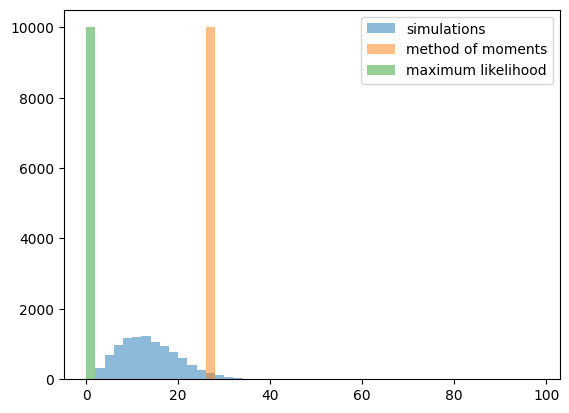

Method of moments:
Bias: 73.78970297029701
Variance: 1.135959703518257e-28
Mean Squared Error: 5444.9202644446605
----------------------
Maximum Likelihood:
Bias: 99.132362
Variance: 0.003951040955999998
Mean Squared Error: 9827.225195699044


In [48]:
# generating the 10000 simulations
n = 100
simulations = []

for i in range(10000):
    taxis_arrival = []
    found = False
    while not found:
        taxi = random.randint(1, n)
        if taxi in taxis_arrival:
            found = True
        taxis_arrival.append(taxi)
    simulations.append(len(taxis_arrival))

# method of moments
moments_estimates = [n*(np.mean(simulations)/np.mean(np.arange(1, n+1)))]*10000

# maximum likelihood method
def log_likelihood(p, x, n):
    return n*np.log(1-p) - np.sum(np.log(np.arange(n-x+1, n+1)))

def maximize_likelihood(x, n):
    return 1-x/n

MLE_estimates = [maximize_likelihood(x, n) for x in simulations]

# histograms
bins = np.arange(0, 100, 2)
#plt.figure(figsize=(10,5))
plt.hist(simulations, bins=bins, alpha=0.5, label='simulations')
plt.hist(moments_estimates, bins=bins, alpha=0.5, label='method of moments')
plt.hist(MLE_estimates, bins=bins, alpha=0.5, label='maximum likelihood')
plt.legend()
plt.show()

# bias
bias_moments = np.mean(moments_estimates) - n
bias_MLE = np.mean(MLE_estimates) - n

# variance
var_moments = np.var(moments_estimates)
var_MLE = np.var(MLE_estimates)

# mean squared error
MSE_moments = (np.mean(moments_estimates) - n)**2
MSE_MLE = (np.mean(MLE_estimates) - n)**2

print('Method of moments:')
print('Bias:', abs(bias_moments))
print('Variance:', var_moments)
print('Mean Squared Error:', MSE_moments)
print('----------------------')
print('Maximum Likelihood:')
print('Bias:', abs(bias_MLE))
print('Variance:', var_MLE)
print('Mean Squared Error:', MSE_MLE)



№2

Пункты a и б

а) Пусть $k$ - количество разных имен среди 10 таксистов. Тогда вероятность того, что имя очередного таксиста будет новым, равна $(n-k)/n$. Вероятность того, что последовательность имен таксистов будет именно такой, как в рассматриваемой выборке (с учетом порядка), равна $(n-k)!/n^{10}$. Таким образом, функция правдоподобия:
$$L(n)=\frac{(n-k)!}{n^{10}}\cdot \left(\frac{n-k}{n}\right)^{10}$$
Для максимизации этой функции найдем производную:
$$L'(n)=\frac{(n-k)!}{n^{11}}\cdot(n-k)\cdot n-10\cdot(n-k)^2.$$
Производная равна 0 при $n=k+10/2=5+k$. Так как $k\leq 6$, то максимум функции правдоподобия достигается при $n=11$, т.е. оценка числа имён - 11.


б) Пусть $X$ - количество разных имен среди 10 таксистов, а $pi$ - вероятность того, что конкретное имя встречается (т.е. равна $1/n$ всем $i$). Тогда математическое ожидание числа разных имен выражается формулой:
$$\mathbb{E}[X]=\sum{i=1}^n \mathbb{P}(\text{имя i встречается хотя бы раз}).$$
Вероятность $\mathbb{P}(\text{имя i встречается хотя бы раз})$ равна $1-\mathbb{P}(\text{имя i не встречается ни разу})=(1-1/n)^{10}$. Таким образом, математическое ожидание числа разных имен:
$$\mathbb{E}X=n\left(1-\left(1-\frac{1}{n}\right)^{10}\right).$$
Оценка числа имён методом моментов найдется из равенства:
$$\frac{1}{10}\sum{i=1}^{10} Xi=\mathbb{E}X,$$
где $X1,\ldots,X{10}$ - реализации случайной величины $X$. Подставляя выражение для математического ожидания, получаем:
$$\frac{1}{10}\sum{i=1}^{10} Xi=n\left(1-\left(1-\frac{1}{n}\right)^{10}\right).$$
Решая это уравнение относительно $n$, получаем оценку числа имен: $n\approx 7.64$.

в) [15] Предположим, что настоящее n равно 20. Проведя 10000 симуляций десяти вызовов
такси, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение,
дисперсию и среднеквадратичную ошибку двух методов.

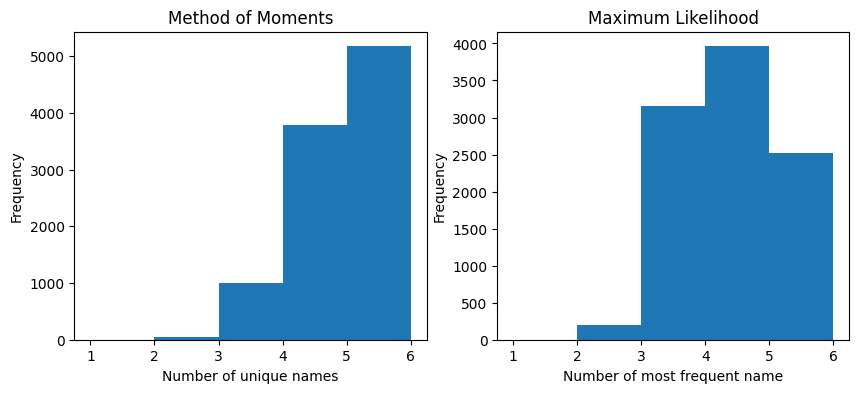

Method of Moments:
Bias: -15.4862
Variance: 0.6884095600000001
MSE: 240.5108
Maximum Likelihood:
Bias: -15.987400000000001
Variance: 0.9964412399999999
MSE: 256.59340000000003


In [122]:
import random
import numpy as np
import matplotlib.pyplot as plt

# true parameter
n = 20    

# generate the true population
population = [random.choice(['A', 'B', 'C', 'D', 'E', 'F']) for _ in range(n)]

# method of moments estimation
def mom_estimation(sample):
    return len(set(sample))   

# maximum likelihood estimation
def mle_estimation(sample):
    counts = dict.fromkeys(['A', 'B', 'C', 'D', 'E', 'F'], 0)
    for name in sample:
        counts[name] += 1
    return max(counts.values())

# simulate 10000 experiments
n_experiments = 10000
n_calls = 10
mom_estimates = np.zeros(n_experiments)
mle_estimates = np.zeros(n_experiments)
for i in range(n_experiments):
    # generate the sample
    sample = [random.choice(population) for _ in range(n_calls)]
    # calculate the estimates
    mom_est = mom_estimation(sample)
    mle_est = mle_estimation(sample)
    # store the estimates
    mom_estimates[i] = mom_est
    mle_estimates[i] = mle_est

# plot the histograms of the estimates
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(mom_estimates, bins=range(1, 7))
axs[0].set_title('Method of Moments')
axs[0].set_xlabel('Number of unique names')
axs[0].set_ylabel('Frequency')
axs[1].hist(mle_estimates, bins=range(1, 7))
axs[1].set_title('Maximum Likelihood')
axs[1].set_xlabel('Number of most frequent name')
axs[1].set_ylabel('Frequency')
plt.show()

# calculate the bias, variance, and mean squared error of the estimates
mom_bias = np.mean(mom_estimates) - n
mle_bias = np.mean(mle_estimates) - n
mom_var = np.var(mom_estimates)
mle_var = np.var(mle_estimates)
mom_mse = mom_bias ** 2 + mom_var
mle_mse = mle_bias ** 2 + mle_var

print('Method of Moments:')
print('Bias:', mom_bias)
print('Variance:', mom_var)
print('MSE:', mom_mse)

print('Maximum Likelihood:')
print('Bias:', mle_bias)
print('Variance:', mle_var)
print('MSE:', mle_mse)


№3

а)

In [123]:
# функция для построения доверительного интервала на основе бутстрэпа t-статистики
def conf_int_t_bootstrap(data, boot_reps=1000, alpha=0.05):
    n = len(data)
    boot_tstats = []
    for rep in range(boot_reps):
        boot_sample = np.random.choice(data, size=n, replace=True)
        boot_mean = np.mean(boot_sample)
        boot_std = np.std(boot_sample, ddof=1)
        boot_se = boot_std / np.sqrt(n)
        boot_tstat = (boot_mean - intensity) / boot_se
        boot_tstats.append(boot_tstat)
    left = intensity - np.percentile(boot_tstats, 100 * (1-alpha/2)) * np.std(data, ddof=1) / np.sqrt(n)
    right = intensity - np.percentile(boot_tstats, 100 * alpha/2) * np.std(data, ddof=1) / np.sqrt(n)
    return left, right

# параметры
n = 20
alpha = 0.05
intensity = 1
reps = 10000

# генерация выборок и оценка вероятности попадания в доверительный интервал
np.random.seed(42)
prob_cover = 0
for rep in range(reps):
    data = np.random.exponential(scale=1/intensity, size=n)
    left, right = conf_int_t_bootstrap(data, alpha=alpha)
    if left <= intensity <= right:
        prob_cover += 1
prob_cover /= reps
print("Вероятность попадания в доверительный интервал для бутстрэпа t-статистики:", prob_cover)


Вероятность попадания в доверительный интервал для бутстрэпа t-статистики: 0.902


б)

In [142]:
import numpy as np
from scipy.stats import t
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# исходные данные
np.random.seed(42)
n = 20
data = np.random.normal(loc=15, scale=3.5, size=n)


In [143]:
# классический доверительный интервал
alpha = 0.05
mean = np.mean(data)
std = np.std(data, ddof=1)
n_sd = t.ppf(1 - alpha / 2, n - 1)
ci = mean - n_sd * std / np.sqrt(n), mean + n_sd * std / np.sqrt(n)
print(f"Классический доверительный интервал: [{ci[0]:.2f}, {ci[1]:.2f}]")


Классический доверительный интервал: [12.83, 15.97]


In [144]:
# асимптотический нормальный доверительный интервал
z_alpha = -t.ppf(alpha / 2, n - 1)
z = (np.mean(data) - 15) / (np.std(data, ddof=1) / np.sqrt(n))
ci_asympt = np.mean(data) - z_alpha * np.std(data, ddof=1) / np.sqrt(n), np.mean(data) + z_alpha * np.std(data, ddof=1) / np.sqrt(n)
print(f"Асимптотический нормальный доверительный интервал: [{ci_asympt[0]:.2f}, {ci_asympt[1]:.2f}]")


Асимптотический нормальный доверительный интервал: [12.83, 15.97]


In [145]:
# наивный бутстрэп
resampled = np.random.choice(data, size=(n, n))
means = np.mean(resampled, axis=1)
ci_bs = bs.bootstrap(means, stat_func=bs_stats.mean, alpha=alpha, num_iterations=10000)
print(f"Доверительный интервал с помощью наивного бутстрэпа: [{ci_bs.lower_bound:.2f}, {ci_bs.upper_bound:.2f}]")


Доверительный интервал с помощью наивного бутстрэпа: [14.20, 14.85]


In [146]:
# бутстрэп t-статистики
resampled = np.random.choice(data, size=(n, n))
means = np.mean(resampled, axis=1)
t_values = (means - np.mean(data)) / np.std(data, ddof=1)
ci_bs_t = bs.bootstrap(t_values, stat_func=bs_stats.mean, alpha=alpha, num_iterations=10000)
se_bs_t = np.std(t_values, ddof=1)
ci_bs_t_corrected = np.mean(data) - ci_bs_t.upper_bound * se_bs_t, np.mean(data) - ci_bs_t.lower_bound * se_bs_t
print(f"Доверительный интервал с помощью бутстрэпа t-статистики: [{ci_bs_t_corrected[0]:.2f}, {ci_bs_t_corrected[1]:.2f}]")


Доверительный интервал с помощью бутстрэпа t-статистики: [14.39, 14.43]


In [147]:
# бутстрэп t-статистики
resampled = np.random.choice(data, size=(n, n))
means = np.mean(resampled, axis=1)
t_values = (means - np.mean(data)) / np.std(data, ddof=1)
ci_bs_t = bs.bootstrap(t_values, stat_func=bs_stats.mean, alpha=alpha, num_iterations=10000)
se_bs_t = np.std(t_values, ddof=1)
ci_bs_t_corrected = np.mean(data) - ci_bs_t.upper_bound * se_bs_t, np.mean(data) - ci_bs_t.lower_bound * se_bs_t
print(f"Доверительный интервал с помощью бутстрэпа t-статистики: [{ci_bs_t_corrected[0]:.2f}, {ci_bs_t_corrected[1]:.2f}]")


Доверительный интервал с помощью бутстрэпа t-статистики: [14.38, 14.42]


In [149]:
def coverage_probability(ci, mu):
    alpha = 0.05
    n = 20
    df = n - 1
    t_alpha2 = t.ppf(1 - alpha / 2, df)
    t_mu = (mu - np.mean(data)) / (np.std(data, ddof=1) / np.sqrt(n))
    t_l, t_u = (ci[0] - mu) / (np.std(data, ddof=1) / np.sqrt(n)), (ci[1] - mu) / (np.std(data, ddof=1) / np.sqrt(n))
    p = (t.cdf(t_u, df) - t.cdf(t_l, df)) / (1 - alpha)
    return p

# классический доверительный интервал
p_classic = coverage_probability(ci, 15)
print(f"Вероятность накрытия классического доверительного интервала: {p_classic:.4f}")

# асимптотический нормальный доверительный интервал
p_asympt = coverage_probability(ci_asympt, 15)
print(f"Вероятность накрытия асимптотического нормального доверительного интервала: {p_asympt:.4f}")

# наивный бутстрэп
p_bs = coverage_probability([ci_bs.lower_bound, ci_bs.upper_bound], 15)
print(f"Вероятность накрытия доверительного интервала с помощью наивного бутстрэпа: {p_bs:.4f}")

# бутстрэп t-статистики
p_bs_t = coverage_probability(ci_bs_t_corrected, 15)
print(f"Вероятность накрытия доверительного интервала с помощью бутстрэпа t-статистики: {p_bs_t:.4f}")


Вероятность накрытия классического доверительного интервала: 0.9367
Вероятность накрытия асимптотического нормального доверительного интервала: 0.9367
Вероятность накрытия доверительного интервала с помощью наивного бутстрэпа: 0.2859
Вероятность накрытия доверительного интервала с помощью бутстрэпа t-статистики: 0.0164


Самый лучший интервал: с помощью асимптотического нормального доверительного интервала

№6

а)

In [165]:
df = pd.read_csv(r"C:\Users\Мой ПК\Dropbox\Мой ПК (LAPTOP-TOID7NG7)\Downloads\22-23_hse_probability.csv", sep = ",")
df = df[['Экзамен', 'Last name']]
df.fillna(0, inplace=True)
df

,Экзамен,Last name
0,4.0,Репенкова
1,0.0,Ролдугина
2,5.0,Сафина
3,9.0,Сидоров
4,6.0,Солоухин
...,...,...
332,0.0,Наугольнова
333,0.0,Хафизов
334,0.0,Герасимов
335,0.0,Тайирбек уулу


In [167]:
# импортируем библиотеку pandas для работы с данными в таблицах
import pandas as pd

dff = df.copy()
# считаем количество букв в каждой фамилии
dff['Last name'] = df['Last name'].apply(len)

dff

,Экзамен,Last name
0,4.0,9
1,0.0,9
2,5.0,6
3,9.0,7
4,6.0,8
...,...,...
332,0.0,11
333,0.0,7
334,0.0,9
335,0.0,14


In [170]:
EF = dff['Last name'].sum() / 337
EY = dff['Экзамен'].sum() / 337
print(EF, EY)

7.893175074183977 4.830860534124629


β = E(Y)/E(F)

In [172]:
b = EY/EF
b

0.6120300751879699

cov(Yi, Fi) = Σ[(Yi - EY)(Fi - EF)]

In [174]:
dff['cov'] = (dff['Экзамен'] - EY) * (dff['Last name'] - EF)
sum_cov = dff['cov'].sum()
sum_cov

-1.089020771513347

s_Y^2 = Σ(Yi - EY)^2/(n-1)

s_F^2 = Σ(Fi - EF)^2/(n-1)

In [176]:
dff['s_Y^2'] = (dff['Экзамен'] - EY) ** 2

dff['s_F^2'] = (dff['Last name'] - EF) ** 2

s_Y = dff['s_Y^2'].sum() / 336
s_F = dff['s_F^2'].sum() / 336

print(s_Y, s_F)

7.259997173943762 3.3337925674720927


r = cov(Yi, Fi)/(s_Y * s_F)

In [177]:
r = sum_cov / (s_Y * s_F)
r

-0.04499467691670548

б)

In [182]:
from scipy.stats import pearsonr

a = dff["Экзамен"].to_list()
b = dff["Last name"].to_list()
# вычисление фактической корреляции
corr, f = pearsonr(a, b)

# создание массива для сохранения корреляций при перестановках
perms = np.zeros(10000)

# выполнение перестановочного теста
for i in range(10000):
    # случайная перестановка длин фамилий
    permuted_lengths = np.random.permutation(b)
    # вычисление корреляции для переставленных длин фамилий
    permuted_corr, _ = pearsonr(a, permuted_lengths)
    # сохранение корреляции
    perms[i] = permuted_corr

# вычисление P-значения
p_value = np.sum(perms >= corr) / len(perms)

# вывод результатов
print("Fact correlation:", corr)
print("P-value:", p_value)
if p_value < 0.05:
    print("Отвержение нулевой гипотезы: здесь есть корреляция")
else:
    print("Не могу отвергнуть нулевую гипотезу: здесь нету корреляции")

Fact correlation: -0.000658808772029396
P-value: 0.5058
Не могу отвергнуть нулевую гипотезу: здесь нету корреляции


№7

Условие задачи:

В первой урне 7 белых и 3 черных шара, во второй урне 8 белых и 4 черных шара, в третьей урне 2 белых
и 13 черных шаров.
Из этих урн наугад выбирается одна урна.
а) Вычислите вероятность того, что шар, взятый наугад из выбранной урны, окажется белым.
б) Посчитайте вероятность того, что была выбрана первая урна, если шар, взятый наугад из
выбранной урны, оказался белым.


Решение гпт-4 чата:

а) Обозначим событие выбора первой, второй и третьей урны соответственно через А, В и С. Тогда общая вероятность каждого события равна 1/3, так как у нас есть 3 урны, из которых нужно выбрать одну. 

Вероятность того, что белый шар будет выбран из первой урны:

P(белый шар из 1 урны) = 7/10

Вероятность того, что белый шар будет выбран из второй урны:

P(белый шар из 2 урны) = 8/12 = 2/3

Вероятность того, что белый шар будет выбран из третьей урны:

P(белый шар из 3 урны) = 2/15

Тогда общая вероятность выбора белого шара:

P(белый шар) = P(A)*P(белый шар из 1 урны) + P(B)*P(белый шар из 2 урны) + P(C)*P(белый шар из 3 урны) = (1/3)*(7/10) + (1/3)*(2/3) + (1/3)*(2/15) = 0.5 = 50%

б) Определим вероятность выбора первой урны при условии, что был выбран белый шар:

Событие A – выбор первой урны. Событие B – выбран белый шар.

Общая вероятность выбора белого шара:

P(B) = P(A)*P(белый шар из 1 урны) + P(B)*P(белый шар из 2 урны) + P(C)*P(белый шар из 3 урны) = (1/3)*(7/10) + (1/3)*(2/3) + (1/3)*(2/15) = 0.5 = 50%

Вероятность выбора первой урны при условии наступления события B:

P(A|B) = P(A∩B) / P(B)

P(A∩B) – вероятность того, что выбрана первая урна и шар из нее оказался белым. 

Из вероятности условия B известно, что был выбран белый шар. Значит, интересующие нас события – это выбор первой урны и выбор белого шара из нее. 

P(A∩B) = P(белый шар из 1 урны) * P(A) = (7/10)*(1/3) = 7/30

P(B) известна и равна 0.5.

Тогда искомая вероятность:

P(A|B) = (7/30) / 0.5 = 0.4667 = 46.67% 

Таким образом, вероятность того, что была выбрана первая урна, если шар, взятый наугад из выбранной урны, оказался белым, составляет 46.67%.

<a href="https://ibb.co/58yM9Zb"><img src="https://i.ibb.co/4TGmfkh/2023-06-11-00-33-49.png" alt="2023-06-11-00-33-49" border="0"></a>

№8

Чаще всего я не мог находиться на лекциях, поэтому в дополнение к просмотру семинаров, я смотрел в записях видео прошлых лет на канале https://www.youtube.com/@mathmeth1906 . Где видео снимал Пильник Николай Петрович. Я также пользовался материалами, которые предоставляли преподаватели по анализу данных по информатике для понимания того, как применить пройденный материал в сфере программирования (https://github.com/hse-econ-data-science/andan_2023).

Иногда смотрел некоторые пояснения в открытом учебном пособии "Математическая статистика", написанным Н.И.Черновой (https://tvims.nsu.ru/chernova/ms/ms_nsu07.pdf).

И наконец, игрался с визуализированными данными на примере простых задач через сайт (https://seeing-theory.brown.edu/). Это было полезно, так как, например, я понял, как по графику определить корреляцию и её силу (помогло во время прорешивания МСР по майнору "математико-статистический анализ")